In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing the dataset
test = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')
EId = test["Emp_ID"]

In [3]:
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1


In [4]:
test.head()

,Emp_ID
0,394
1,173
2,1090
3,840
4,308


In [5]:
df = df.drop_duplicates(subset="Emp_ID")

In [6]:
df = df.drop(["LastWorkingDate"], axis = 1)
df.head()

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,1,1,2381060,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,2,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,2,2,0,1
10,2016-01-01,5,29,Male,C9,College,46368,2016-01-09,1,1,0,1
13,2017-08-01,6,31,Female,C11,Bachelor,78728,2017-07-31,3,3,0,1


In [7]:
df = df.rename(columns = {'MMM-YY': 'Reporting_Date'}, inplace = False)
df = df.rename(columns = {'Total Business Value': 'Total_Business_Value'}, inplace = False)

In [8]:
df['Reporting_Date'] = pd.to_datetime(df['Reporting_Date'], format='%Y-%m-%d')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], format='%Y-%m-%d')

In [9]:
df.dtypes

Reporting_Date          datetime64[ns]
Emp_ID                           int64
Age                              int64
Gender                          object
City                            object
Education_Level                 object
Salary                           int64
Dateofjoining           datetime64[ns]
Joining Designation              int64
Designation                      int64
Total_Business_Value             int64
Quarterly Rating                 int64
dtype: object

In [10]:
df['Male'] = df['Gender'].map( {'Male':1, 'Female':0} )
df[['Gender', 'Male']]
df = df.drop(["Gender"], axis = 1)

In [11]:
df

,Reporting_Date,Emp_ID,Age,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male
0,2016-01-01,1,28,C23,Master,57387,2015-12-24,1,1,2381060,2,1
3,2017-11-01,2,31,C7,Master,67016,2017-11-06,2,2,0,1,1
5,2016-12-01,4,43,C13,Master,65603,2016-12-07,2,2,0,1,1
10,2016-01-01,5,29,C9,College,46368,2016-01-09,1,1,0,1,1
13,2017-08-01,6,31,C11,Bachelor,78728,2017-07-31,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2016-01-01,2784,33,C24,College,82815,2012-10-15,2,3,1226590,3,1
19079,2017-08-01,2785,34,C9,College,12105,2017-08-28,1,1,0,1,0
19082,2016-01-01,2786,44,C19,College,35370,2015-07-31,2,2,221080,2,1
19091,2016-01-01,2787,28,C20,Master,69498,2015-07-21,1,1,408090,2,0


<AxesSubplot:xlabel='City', ylabel='count'>

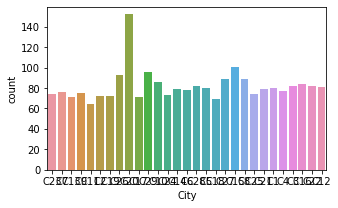

In [12]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=df,x='City')

In [13]:
from sklearn.preprocessing import LabelEncoder
df['City'] = LabelEncoder().fit_transform(df['City'])
encoder = LabelEncoder()
encoder.fit(df['City'])
encoder.classes_
df['City'] = encoder.transform(df['City'])
df

,Reporting_Date,Emp_ID,Age,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male
0,2016-01-01,1,28,15,Master,57387,2015-12-24,1,1,2381060,2,1
3,2017-11-01,2,31,26,Master,67016,2017-11-06,2,2,0,1,1
5,2016-12-01,4,43,4,Master,65603,2016-12-07,2,2,0,1,1
10,2016-01-01,5,29,28,College,46368,2016-01-09,1,1,0,1,1
13,2017-08-01,6,31,2,Bachelor,78728,2017-07-31,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2016-01-01,2784,33,16,College,82815,2012-10-15,2,3,1226590,3,1
19079,2017-08-01,2785,34,28,College,12105,2017-08-28,1,1,0,1,0
19082,2016-01-01,2786,44,10,College,35370,2015-07-31,2,2,221080,2,1
19091,2016-01-01,2787,28,12,Master,69498,2015-07-21,1,1,408090,2,0


In [14]:
df['Education_Level'] = df['Education_Level'].map( {'College':0, 'Bachelor':1, 'Master':2})

In [15]:
df.dtypes

Reporting_Date          datetime64[ns]
Emp_ID                           int64
Age                              int64
City                             int64
Education_Level                  int64
Salary                           int64
Dateofjoining           datetime64[ns]
Joining Designation              int64
Designation                      int64
Total_Business_Value             int64
Quarterly Rating                 int64
Male                             int64
dtype: object

df["Total Business Value"]=(df["Total Business Value"]-df["Total Business Value"].mean())/df["Total Business Value"].std()

In [16]:
df

,Reporting_Date,Emp_ID,Age,City,Education_Level,Salary,Dateofjoining,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male
0,2016-01-01,1,28,15,2,57387,2015-12-24,1,1,2381060,2,1
3,2017-11-01,2,31,26,2,67016,2017-11-06,2,2,0,1,1
5,2016-12-01,4,43,4,2,65603,2016-12-07,2,2,0,1,1
10,2016-01-01,5,29,28,0,46368,2016-01-09,1,1,0,1,1
13,2017-08-01,6,31,2,1,78728,2017-07-31,3,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2016-01-01,2784,33,16,0,82815,2012-10-15,2,3,1226590,3,1
19079,2017-08-01,2785,34,28,0,12105,2017-08-28,1,1,0,1,0
19082,2016-01-01,2786,44,10,0,35370,2015-07-31,2,2,221080,2,1
19091,2016-01-01,2787,28,12,2,69498,2015-07-21,1,1,408090,2,0


In [17]:
df = df.drop(["Dateofjoining"], axis = 1)

In [18]:
df['month'] = df['Reporting_Date'].dt.month
df['year'] = df['Reporting_Date'].dt.year
df = df.drop(["Reporting_Date"], axis = 1)
df

,Emp_ID,Age,City,Education_Level,Salary,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male,month,year
0,1,28,15,2,57387,1,1,2381060,2,1,1,2016
3,2,31,26,2,67016,2,2,0,1,1,11,2017
5,4,43,4,2,65603,2,2,0,1,1,12,2016
10,5,29,28,0,46368,1,1,0,1,1,1,2016
13,6,31,2,1,78728,3,3,0,1,0,8,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2784,33,16,0,82815,2,3,1226590,3,1,1,2016
19079,2785,34,28,0,12105,1,1,0,1,0,8,2017
19082,2786,44,10,0,35370,2,2,221080,2,1,1,2016
19091,2787,28,12,2,69498,1,1,408090,2,0,1,2016


In [19]:
df['TargetYear'] = df['year'].map({2016:0})
df['TargetYear'] = df['TargetYear'].fillna(1)
df.TargetYear = df.TargetYear.astype(int)
df['TargetValue'] = df['Total_Business_Value'].map({0:1})
df['TargetValue'] = df['TargetValue'].fillna(0)
df.TargetValue = df.TargetValue.astype(int)
df

,Emp_ID,Age,City,Education_Level,Salary,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male,month,year,TargetYear,TargetValue
0,1,28,15,2,57387,1,1,2381060,2,1,1,2016,0,0
3,2,31,26,2,67016,2,2,0,1,1,11,2017,1,1
5,4,43,4,2,65603,2,2,0,1,1,12,2016,0,1
10,5,29,28,0,46368,1,1,0,1,1,1,2016,0,1
13,6,31,2,1,78728,3,3,0,1,0,8,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2784,33,16,0,82815,2,3,1226590,3,1,1,2016,0,0
19079,2785,34,28,0,12105,1,1,0,1,0,8,2017,1,1
19082,2786,44,10,0,35370,2,2,221080,2,1,1,2016,0,0
19091,2787,28,12,2,69498,1,1,408090,2,0,1,2016,0,0


In [20]:
df.describe()

,Emp_ID,Age,City,Education_Level,Salary,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male,month,year,TargetYear,TargetValue
count,2381.000000,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1397.559009,33.090298,14.074339,1.00756,59209.060899,1.820244,2.078538,2.911751e+05,1.486350,0.589668,4.791684,2016.346493,0.346493,0.660647
std,806.161628,5.840729,8.252167,0.81629,28275.899087,0.841433,0.931321,8.117283e+05,0.834348,0.491997,4.029444,0.475952,0.475952,0.473589
min,1.000000,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.590270e+06,1.000000,0.000000,1.000000,2016.000000,0.000000,0.000000
25%,695.000000,29.000000,7.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,1.000000,0.000000,1.000000,2016.000000,0.000000,0.000000
50%,1400.000000,33.000000,14.000000,1.00000,55276.000000,2.000000,2.000000,0.000000e+00,1.000000,1.000000,4.000000,2016.000000,0.000000,1.000000
75%,2100.000000,37.000000,21.000000,2.00000,75765.000000,2.000000,3.000000,2.505900e+05,2.000000,1.000000,8.000000,2017.000000,1.000000,1.000000
max,2788.000000,58.000000,28.000000,2.00000,188418.000000,5.000000,5.000000,1.039816e+07,4.000000,1.000000,12.000000,2017.000000,1.000000,1.000000


In [21]:
df.loc[(df['Age'] <= 35) & (df['Age'] > 24), 'TargetAge'] = 1
df.loc[(df['Age'] >= 35) & (df['Age'] < 24), 'TargetAge'] = 0
df['TargetAge'] = df['TargetAge'].fillna(0)
df.TargetAge = df.TargetAge.astype(int)
df

,Emp_ID,Age,City,Education_Level,Salary,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male,month,year,TargetYear,TargetValue,TargetAge
0,1,28,15,2,57387,1,1,2381060,2,1,1,2016,0,0,1
3,2,31,26,2,67016,2,2,0,1,1,11,2017,1,1,1
5,4,43,4,2,65603,2,2,0,1,1,12,2016,0,1,0
10,5,29,28,0,46368,1,1,0,1,1,1,2016,0,1,1
13,6,31,2,1,78728,3,3,0,1,0,8,2017,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2784,33,16,0,82815,2,3,1226590,3,1,1,2016,0,0,1
19079,2785,34,28,0,12105,1,1,0,1,0,8,2017,1,1,1
19082,2786,44,10,0,35370,2,2,221080,2,1,1,2016,0,0,0
19091,2787,28,12,2,69498,1,1,408090,2,0,1,2016,0,0,1


<AxesSubplot:xlabel='Designation', ylabel='Salary'>

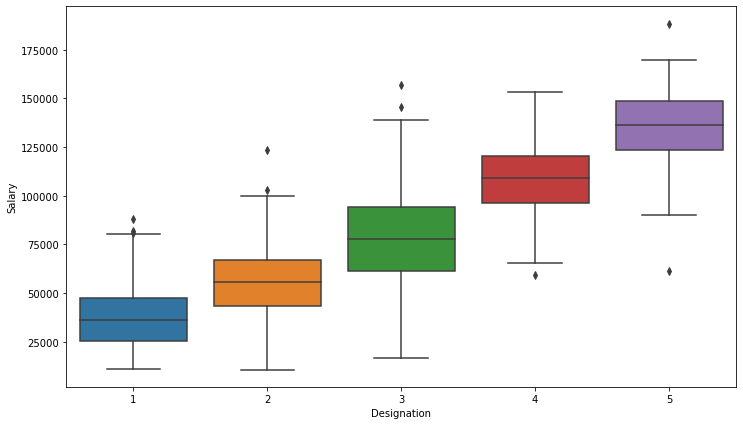

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Designation',y='Salary',data=df)

In [23]:
def impute_age(cols):
    Salary = cols[0]
    Designation = cols[1]
    if Designation == 1:
        return 37500

    elif Designation == 2:
        return 57000
        
    elif Designation == 3:
        return 75000
        
    elif Designation == 4:
        return 110000

    else:
        return 13

In [24]:
df['NewSalary'] = df[['Salary','Designation']].apply(impute_age,axis=1)
df['NewSalary']

0        37500
3        57000
5        57000
10       37500
13       75000
         ...  
19055    75000
19079    37500
19082    57000
19091    37500
19097    57000
Name: NewSalary, Length: 2381, dtype: int64

In [25]:
df.loc[df['Salary'] < df["NewSalary"], 'TargetSal'] = 1
df['TargetSal'] = df['TargetSal'].fillna(0)
df.TargetSal = df.TargetSal.astype(int)
df

,Emp_ID,Age,City,Education_Level,Salary,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male,month,year,TargetYear,TargetValue,TargetAge,NewSalary,TargetSal
0,1,28,15,2,57387,1,1,2381060,2,1,1,2016,0,0,1,37500,0
3,2,31,26,2,67016,2,2,0,1,1,11,2017,1,1,1,57000,0
5,4,43,4,2,65603,2,2,0,1,1,12,2016,0,1,0,57000,0
10,5,29,28,0,46368,1,1,0,1,1,1,2016,0,1,1,37500,0
13,6,31,2,1,78728,3,3,0,1,0,8,2017,1,1,1,75000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19055,2784,33,16,0,82815,2,3,1226590,3,1,1,2016,0,0,1,75000,0
19079,2785,34,28,0,12105,1,1,0,1,0,8,2017,1,1,1,37500,1
19082,2786,44,10,0,35370,2,2,221080,2,1,1,2016,0,0,0,57000,1
19091,2787,28,12,2,69498,1,1,408090,2,0,1,2016,0,0,1,37500,0


In [26]:
df = df.drop(["NewSalary"], axis = 1)

In [27]:
X = df.iloc[:, [0,-1,-2,-3,-4]]
X

,Emp_ID,TargetSal,TargetAge,TargetValue,TargetYear
0,1,0,1,0,0
3,2,0,1,1,1
5,4,0,0,1,0
10,5,0,1,1,0
13,6,0,1,1,1
...,...,...,...,...,...
19055,2784,0,1,0,0
19079,2785,1,1,1,1
19082,2786,1,0,0,0
19091,2787,0,1,0,0


In [28]:
def impute_tar(cols):
    Sal = cols[0]
    Age = cols[1]
    Value = cols[2]
    Year = cols[3]
    
    if Sal + Age + Value + Year == 1:
        return 0

    elif Sal + Age + Value + Year == 2:
        return 0
        
    elif Sal + Age + Value + Year == 3:
        return 1
        
    elif Sal + Age + Value + Year == 4:
        return 1

    else:
        return 0

In [29]:
df['Newtarget'] = df[['TargetSal','TargetAge','TargetValue','TargetYear']].apply(impute_tar,axis=1)
df['Newtarget']

0        0
3        1
5        0
10       0
13       1
        ..
19055    0
19079    1
19082    0
19091    0
19097    1
Name: Newtarget, Length: 2381, dtype: int64

In [30]:
X, df['Newtarget']

(       Emp_ID  TargetSal  TargetAge  TargetValue  TargetYear
 0           1          0          1            0           0
 3           2          0          1            1           1
 5           4          0          0            1           0
 10          5          0          1            1           0
 13          6          0          1            1           1
 ...       ...        ...        ...          ...         ...
 19055    2784          0          1            0           0
 19079    2785          1          1            1           1
 19082    2786          1          0            0           0
 19091    2787          0          1            0           0
 19097    2788          0          1            1           1
 
 [2381 rows x 5 columns],
 0        0
 3        1
 5        0
 10       0
 13       1
         ..
 19055    0
 19079    1
 19082    0
 19091    0
 19097    1
 Name: Newtarget, Length: 2381, dtype: int64)

In [31]:
final = pd.merge(test, df, on=['Emp_ID'])
final.head()

,Emp_ID,Age,City,Education_Level,Salary,Joining Designation,Designation,Total_Business_Value,Quarterly Rating,Male,month,year,TargetYear,TargetValue,TargetAge,TargetSal,Newtarget
0,394,32,12,2,97722,2,4,189360,1,0,1,2016,0,0,1,1,0
1,173,37,20,0,56174,1,3,1295750,2,1,1,2016,0,0,0,1,0
2,1090,37,4,0,96750,2,4,1382660,3,1,1,2016,0,0,0,1,0
3,840,39,27,0,88813,1,4,391050,1,0,1,2016,0,0,0,1,0
4,308,30,24,2,188418,2,5,1507300,3,1,1,2016,0,0,1,0,0


In [32]:
final.Newtarget

0      0
1      0
2      0
3      0
4      0
      ..
736    0
737    0
738    0
739    0
740    0
Name: Newtarget, Length: 741, dtype: int64

<AxesSubplot:xlabel='Newtarget', ylabel='count'>

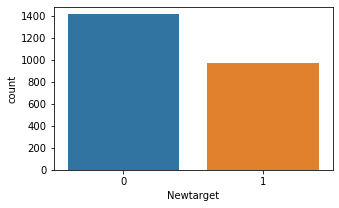

In [36]:
fig,ax = plt.subplots(figsize=(5,3))
sns.countplot(data=df,x='Newtarget')

In [35]:
submission = pd.DataFrame({
                           "Emp_ID": EId,
                           "Target": final.Newtarget
                           })
submission.to_csv('Resultfull.csv', index=False)